# **Statlog Heart:** Clustering
Aurellia Gita Elysia | 2602569722

Dataset:<br>
https://archive.ics.uci.edu/dataset/145/statlog%252Bheart

-------

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# 2. Load Dataset

In [2]:
file_path = 'statlog_heart/heart.dat' 

In [3]:
column_names = [
    'age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'serum_cholestoral',
    'fasting_blood_sugar', 'resting_electrocardiographic_results', 'max_heart_rate_achieved',
    'exercise_induced_angina', 'oldpeak', 'slope_peak_st_segment', 'num_major_vessels',
    'thal', 'presence'
]

df = pd.read_csv(file_path, header=None, names=column_names, sep=' ')
df.head(15)

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope_peak_st_segment,num_major_vessels,thal,presence
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
5,65.0,1.0,4.0,120.0,177.0,0.0,0.0,140.0,0.0,0.4,1.0,0.0,7.0,1
6,56.0,1.0,3.0,130.0,256.0,1.0,2.0,142.0,1.0,0.6,2.0,1.0,6.0,2
7,59.0,1.0,4.0,110.0,239.0,0.0,2.0,142.0,1.0,1.2,2.0,1.0,7.0,2
8,60.0,1.0,4.0,140.0,293.0,0.0,2.0,170.0,0.0,1.2,2.0,2.0,7.0,2
9,63.0,0.0,4.0,150.0,407.0,0.0,2.0,154.0,0.0,4.0,2.0,3.0,7.0,2


# 3. Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    float64
 1   sex                                   270 non-null    float64
 2   chest_pain_type                       270 non-null    float64
 3   resting_blood_pressure                270 non-null    float64
 4   serum_cholestoral                     270 non-null    float64
 5   fasting_blood_sugar                   270 non-null    float64
 6   resting_electrocardiographic_results  270 non-null    float64
 7   max_heart_rate_achieved               270 non-null    float64
 8   exercise_induced_angina               270 non-null    float64
 9   oldpeak                               270 non-null    float64
 10  slope_peak_st_segment                 270 non-null    float64
 11  num_major_vessels  

In [5]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope_peak_st_segment,num_major_vessels,thal,presence
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


# 4. Data Preprocessing

## 4.1. Duplicate Data

In [6]:
print('Duplicates in dataset:', df.duplicated().sum())

Duplicates in dataset: 0


## 4.2. Missing Value

In [7]:
df.isnull().sum()

age                                     0
sex                                     0
chest_pain_type                         0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
oldpeak                                 0
slope_peak_st_segment                   0
num_major_vessels                       0
thal                                    0
presence                                0
dtype: int64

## 4... Feature Engineering

In [8]:
# Feature 1: Age to Maximum Heart Rate Ratio
df['age_to_max_heart_rate'] = df['age'] / df['max_heart_rate_achieved']

# Feature 2: Serum Cholesterol to Resting Blood Pressure Ratio
df['cholesterol_to_blood_pressure'] = df['serum_cholestoral'] / df['resting_blood_pressure']

# Feature 5: Interaction feature between exercise induced angina and max heart rate
df['angina_max_heart_rate'] = df['exercise_induced_angina'] * df['max_heart_rate_achieved']

# Display the new features in the DataFrame
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope_peak_st_segment,num_major_vessels,thal,presence,age_to_max_heart_rate,cholesterol_to_blood_pressure,angina_max_heart_rate
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2,0.642202,2.476923,0.0
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1,0.418750,4.904348,0.0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2,0.404255,2.104839,0.0
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1,0.609524,2.054688,105.0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1,0.611570,2.241667,121.0


## 4.3. Encode Categorical Variables

In [9]:
label_encoder = LabelEncoder()

# Label Encoder for columns with data order
df['slope_peak_st_segment'] = label_encoder.fit_transform(df['slope_peak_st_segment'])
df['fasting_blood_sugar'] = label_encoder.fit_transform(df['fasting_blood_sugar'])
df['oldpeak_group_encoded'] = label_encoder.fit_transform(df['oldpeak_group'])
df['age_group_encoded'] = label_encoder.fit_transform(df['age_group'])

# One-Hot Encoding for columns with no data order
df = pd.get_dummies(df, columns=['chest_pain_type', 'thal', 'sex'], drop_first=True)

df.head()

KeyError: 'oldpeak_group'

In [ ]:
# Drop Encoded Columns
df.drop(columns=['age_group', 'oldpeak_group'], inplace=True)

In [ ]:
# Convert bool columns to int64 (1 = True, 0 = False)
bool_columns = df.select_dtypes(include=['bool']).columns

for col in bool_columns:
    df[col] = df[col].astype('int64')

df = df.apply(pd.to_numeric, errors='coerce')

## 4.4. Split Test/Train Data

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop(columns='presence')
y = df['presence']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

## 4.5. Class Imbalance

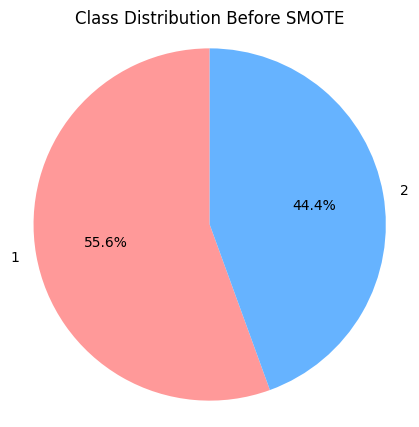

In [ ]:
class_distribution_original = y.value_counts()

plt.figure(figsize=(5, 5))
plt.pie(class_distribution_original, labels=class_distribution_original.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Class Distribution Before SMOTE')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

In [ ]:
df.dtypes

age                                     float64
resting_blood_pressure                  float64
serum_cholestoral                       float64
fasting_blood_sugar                       int64
resting_electrocardiographic_results    float64
max_heart_rate_achieved                 float64
exercise_induced_angina                 float64
oldpeak                                 float64
slope_peak_st_segment                     int64
num_major_vessels                       float64
presence                                  int64
age_to_max_heart_rate                   float64
cholesterol_to_blood_pressure           float64
log_serum_cholestoral                   float64
angina_max_heart_rate                   float64
oldpeak_group_encoded                     int64
age_group_encoded                         int64
chest_pain_type_2.0                       int64
chest_pain_type_3.0                       int64
chest_pain_type_4.0                       int64
thal_6.0                                

In [ ]:
# Initialize SMOTE
smote = SMOTE(random_state=5, sampling_strategy=0.5)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Show the shape of the original and resampled data to compare
print("Original training data shape:", X_train.shape)
print("Resampled training data shape:", X_train_resampled.shape)

Original training data shape: (216, 22)
Resampled training data shape: (232, 22)


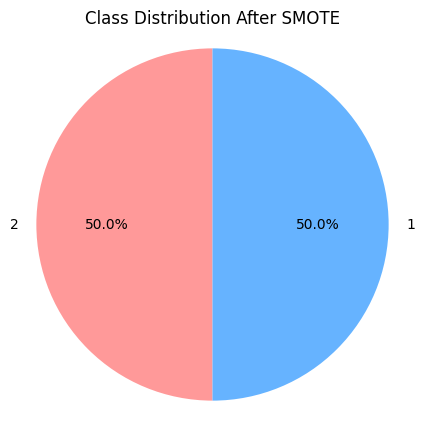

In [ ]:
class_distribution_resampled = y_train_resampled.value_counts()

# Pie chart for resampled class distribution
plt.figure(figsize=(5, 5))
plt.pie(class_distribution_resampled, labels=class_distribution_resampled.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Class Distribution After SMOTE')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

# 5. Decision Tree

## 5.1. Train Model

In [ ]:
dt_model = DecisionTreeClassifier(random_state=5)

rfe = RFE(dt_model, n_features_to_select=12)  # Set the number of features to select
rfe.fit(X_train_resampled, y_train_resampled)
# Fit RFE on the training data
selected_features = X_train_resampled.columns[rfe.support_]
print("Selected features:", selected_features)

# New dataset with only the selected features
X_train_rfe = X_train_resampled[selected_features]

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search_dt = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_rfe, y_train_resampled)

Selected features: Index(['age', 'resting_blood_pressure', 'serum_cholestoral', 'oldpeak',
       'slope_peak_st_segment', 'num_major_vessels', 'age_to_max_heart_rate',
       'cholesterol_to_blood_pressure', 'log_serum_cholestoral',
       'angina_max_heart_rate', 'thal_7.0', 'sex_1.0'],
      dtype='object')


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

## 5.2. Evaluate Model

In [ ]:
# Best parameters
best_dt_params = grid_search_dt.best_params_
best_dt_model = grid_search_dt.best_estimator_

print("Best parameters from GridSearchCV:\n", best_dt_params)

# Evaluate the Decision Tree model
y_pred_dt = best_dt_model.predict(X_test[selected_features])

dt_report = classification_report(y_test, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)

print(f"\nDecision Tree\nClassification Report:\n", dt_report)
print(f"Confusion Matrix:\n", dt_conf_matrix)

Best parameters from GridSearchCV:
 {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}

Decision Tree
Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.79      0.81        34
           2       0.67      0.70      0.68        20

    accuracy                           0.76        54
   macro avg       0.74      0.75      0.74        54
weighted avg       0.76      0.76      0.76        54

Confusion Matrix:
 [[27  7]
 [ 6 14]]


## 5.3. Feature Selection

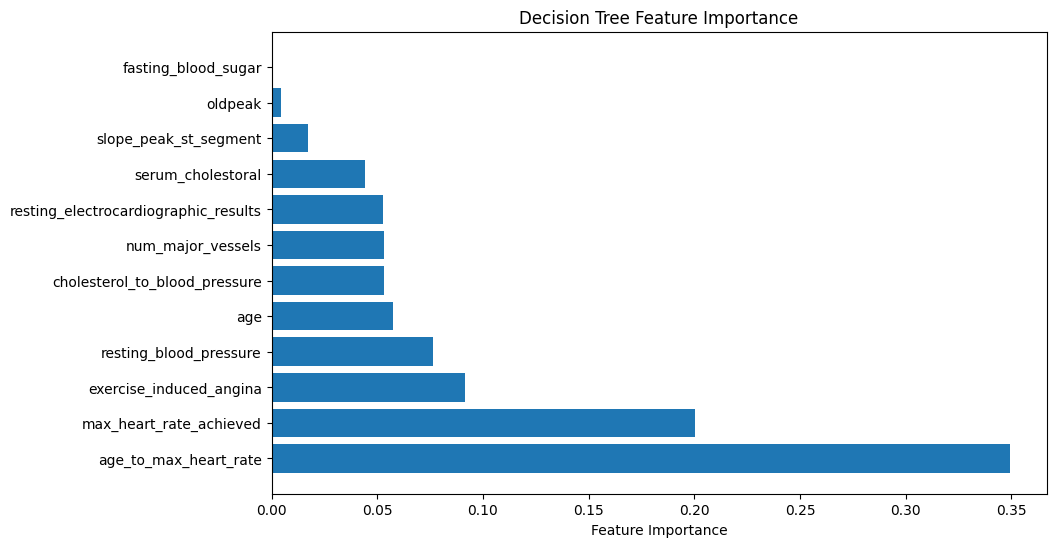

In [ ]:
feature_importances = best_dt_model.feature_importances_

# Create a bar plot of feature importances
features = X_train.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(features[indices], feature_importances[indices])
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()

# 6. Naive Bayes Classifier

## 6.1. Train Model

In [ ]:
rf_model = RandomForestClassifier(random_state=5)
rf_model.fit(X_train_resampled, y_train_resampled)

# Use SelectFromModel to select the important features
selector = SelectFromModel(rf_model, max_features=12, importance_getter='auto')
X_train_rfe = selector.transform(X_train_resampled)

selected_features_mask = selector.get_support()
selected_features_nb = X_train_resampled.columns[selected_features_mask]
print(selected_features_nb)

# Initialize Multinomial Naive Bayes model
nb_model = MultinomialNB(class_prior=[0.2, 0.8])

# Define the hyperparameter grid for GridSearchCV (for Naive Bayes, it's more limited)
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],  # Smoothing parameter for MultinomialNB
    'fit_prior': [True, False]  # Whether to learn the class prior probabilities from the data
}

# Perform GridSearchCV to find the best Naive Bayes model
grid_search_nb = GridSearchCV(nb_model, param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X_train_rfe, y_train_resampled)

c:\Users\Lycia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Index(['age', 'resting_blood_pressure', 'serum_cholestoral',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',
       'num_major_vessels', 'age_to_max_heart_rate',
       'cholesterol_to_blood_pressure', 'log_serum_cholestoral',
       'chest_pain_type_4.0', 'thal_7.0'],
      dtype='object')


GridSearchCV(cv=5, estimator=MultinomialNB(class_prior=[0.2, 0.8]),
             param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
                         'fit_prior': [True, False]},
             scoring='accuracy')

## 6.2. Evaluate Model

In [ ]:
# Best parameters from GridSearchCV
best_nb_params = grid_search_nb.best_params_
best_nb_model = grid_search_nb.best_estimator_

print("Best parameters from GridSearchCV:\n", best_nb_params)

# Evaluate the Naive Bayes model
y_pred_nb = best_nb_model.predict(X_test[selected_features_nb])

# Generate the classification report and confusion matrix
nb_report = classification_report(y_test, y_pred_nb)
nb_conf_matrix = confusion_matrix(y_test, y_pred_nb)

print(f"\nNaive Bayes Classification Report:\n", nb_report)
print(f"Confusion Matrix:\n", nb_conf_matrix)

Best parameters from GridSearchCV:
 {'alpha': 0.1, 'fit_prior': True}

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.74      0.79        34
           2       0.64      0.80      0.71        20

    accuracy                           0.76        54
   macro avg       0.75      0.77      0.75        54
weighted avg       0.78      0.76      0.76        54

Confusion Matrix:
 [[25  9]
 [ 4 16]]


c:\Users\Lycia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
